**NAME:** Hazman Naim Bin Ahsan

**CLASS:** GA-DSBC-23-003

# Multiple Linear Regression

Mobile price depends on various factors such as resolution, brand, size, weight, imaging quality, RAM, battery and cpu power. In this dataset, we want to estimate the price of mobile phones using the provided features. Import the "Cellphone.csv" dataset. Perform a multiple linear regression by considering "price" as the target variable and evaluate the model. 

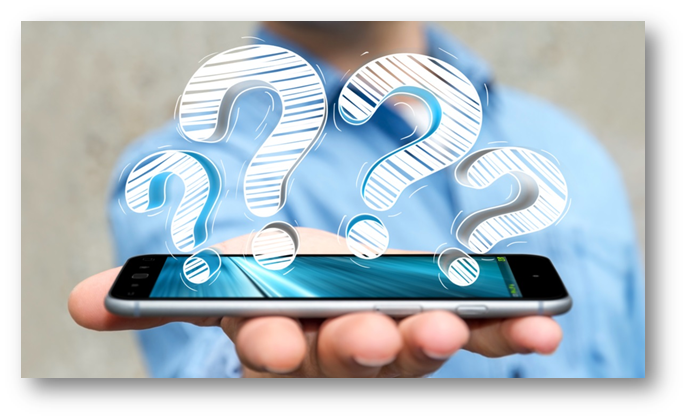

# 1. Prerequisite, Importing Libraries and Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #split training and testing data
from sklearn.linear_model import LinearRegression #machine learning
from sklearn.metrics import mean_squared_error #model evaluation

# 2. Data Preparation

In [2]:
df = pd.read_csv('cellphone.csv')
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


# 3. Exploratory Data Analysis

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Product_id,161.0,675.559006,410.851583,10.0,237.0,774.00,1026.000,1339.0
Price,161.0,2215.596273,768.187171,614.0,1734.0,2258.00,2744.000,4361.0
Sale,161.0,621.465839,1546.618517,10.0,37.0,106.00,382.000,9807.0
weight,161.0,170.426087,92.888612,66.0,134.1,153.00,170.000,753.0
resoloution,161.0,5.209938,1.509953,1.4,4.8,5.15,5.500,12.2
ppi,161.0,335.055901,134.826659,121.0,233.0,294.00,428.000,806.0
cpu core,161.0,4.857143,2.444016,0.0,4.0,4.00,8.000,8.0
cpu freq,161.0,1.502832,0.599783,0.0,1.2,1.40,1.875,2.7
internal mem,161.0,24.501714,28.804773,0.0,8.0,16.00,32.000,128.0
ram,161.0,2.204994,1.609831,0.0,1.0,2.00,3.000,6.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


It seems that our dataset contains only numerical features.

Drop `Product_id` column as it is not relevant for price prediction.

In [16]:
df = df.drop('Product_id', axis=1)

## Data Cleaning

In [17]:
df.isnull().sum()

Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

No missing values in our dataset. Let's identify duplicates in our dataset.


In [18]:
df.duplicated().sum()

0

No duplicates in our dataset.

## Correlation and Relationship

In [19]:
df.columns

Index(['Price', 'Sale', 'weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq',
       'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness'],
      dtype='object')

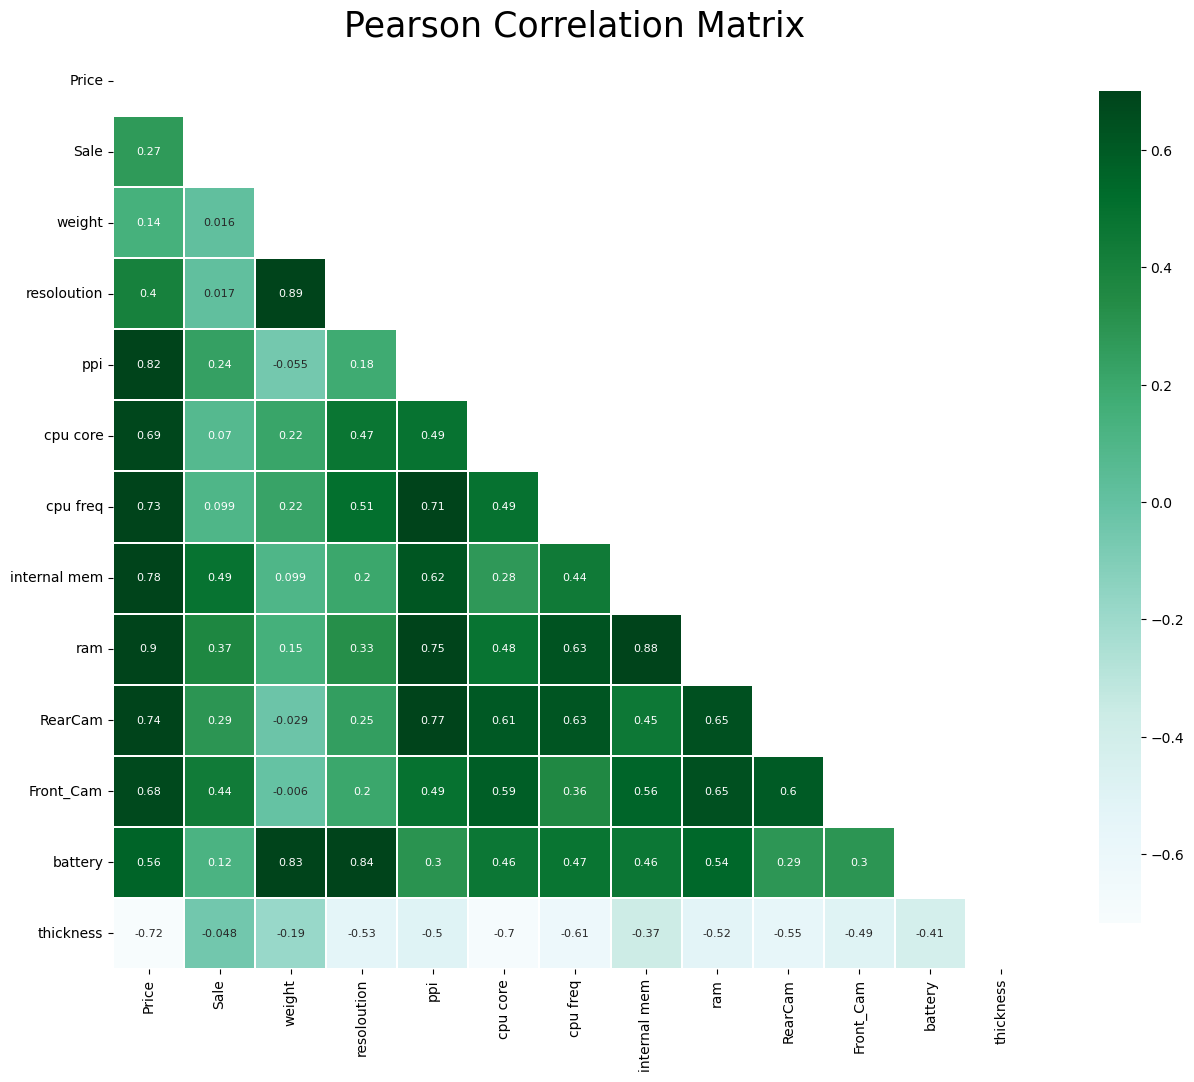

In [20]:
import seaborn as sns

features = ['Price',
            'Sale',
            'weight',
            'resoloution',
            'ppi',
            'cpu core',
            'cpu freq',
            'internal mem',
            'ram',
            'RearCam',
            'Front_Cam',
            'battery',
            'thickness']

mask = np.zeros_like(df[features].corr()) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

Based on the Pearson Correlation analysis, it is evident that there exists a substantial degree of multicollinearity within our dataset among various features. For example, the variables `ram` and `internal memory` exhibit a strong positive correlation coefficient of 0.88. This high correlation implies a redundancy in the information provided by these features.

In the context of feature selection for training models, it is important to address multicollinearity, as algorithms belonging to the General Linear Model (GLM) family are particularly susceptible to issues stemming from multicollinear features due to their underlying algorithmic structures.

For the purposes of this homework assignment, we will temporarily ignore the multicollinearity.

## Features Transformation

Feature transformation encompasses processes such as scaling, which aims to standardize the features within a dataset. In some cases, features may exhibit varying scales, with certain features having high scale values and others having lower scale values, often without any intrinsic meaning. Standardizing the data is employed to mitigate the bias that might emerge due to these scale disparities among features. It is worth noting that many machine learning models tend to perform more effectively when the data has been standardized.

However, for the specific objectives outlined in this homework assignment, we will temporarily ignore the process of feature transformation.

# 4. Model Development

Define functions for evaluation metrics.

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluation_train(y, predictions):
    mse_train = mean_squared_error(y, predictions)
    rmse_train = np.sqrt(mean_squared_error(y, predictions))
    r2_train = r2_score(y, predictions)
    return mse_train, rmse_train, r2_train

def evaluation_test(y, predictions):
    mse_test = mean_squared_error(y, predictions)
    rmse_test = np.sqrt(mean_squared_error(y, predictions))
    r2_test = r2_score(y, predictions)
    return mse_test, rmse_test, r2_test

Lets create a table to store the evaluation metrics.

In [ ]:
#models_table = pd.DataFrame()

In [48]:
models_table = pd.DataFrame(columns=["Model",
                                     "Model Alias",
                                     "Detail",
                                     "MSE (Train)",
                                     "RMSE (Train)",
                                     "R2 Score (Train)",
                                     "MSE (Test)",
                                     "RMSE (Test)",
                                     "R2 Score (Test)"])

models_table = pd.DataFrame(columns=models_table.columns)
models_table.head()

,Model,Model Alias,Detail,MSE (Train),RMSE (Train),R2 Score (Train),MSE (Test),RMSE (Test),R2 Score (Test)


Prepare the data for training.

In [49]:
X = df.drop('Price', axis=1)
Y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 33
number of training samples: 128


## Multiple Linear Regression

Create a Linear Regression Model.

In [50]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

Conduct the model prediction on training and test dataset.

In [51]:
predictions_train = mlr.predict(X_train)
predictions_test = mlr.predict(X_test)

Evaluate the model performance with evaluation metrics.

In [52]:
mse_train, rmse_train, r2_train = evaluation_train(y_train, predictions_train)
mse_test, rmse_test, r2_test = evaluation_test(y_test, predictions_test)

In [53]:
print("-"*30)
print("MULTIPLE LINEAR REGRESSION")
print("-"*30)
print("MSE (Train):", mse_train)
print("RMSE (Train):", rmse_train)
print("R2 Score (Train):", r2_train)
print("MSE (Test):", mse_test)
print("RMSE (Test):", rmse_test)
print("R2 Score (Test):", r2_test)
print("-"*30)

------------------------------
MULTIPLE LINEAR REGRESSION
------------------------------
MSE (Train): 29018.213503806008
RMSE (Train): 170.34733195388182
R2 Score (Train): 0.9528722111207805
MSE (Test): 21909.5338280788
RMSE (Test): 148.01869418448064
R2 Score (Test): 0.9532817612989379
------------------------------


In [54]:
new_row = {"Model": "Multiple Linear Regression",
           "Model Alias": "mlr",
           "Detail": "Features (All), Default", 
           "MSE (Train)": mse_train,
           "RMSE (Train)" : rmse_train,
           "R2 Score (Train)": r2_train,
           "MSE (Test)": mse_test,
           "RMSE (Test)": rmse_test,
           "R2 Score (Test)": r2_test}

new_row_df = pd.DataFrame([new_row])
models_table = pd.concat([models_table, new_row_df], ignore_index=True)
models_table

,Model,Model Alias,Detail,MSE (Train),RMSE (Train),R2 Score (Train),MSE (Test),RMSE (Test),R2 Score (Test)
0,Multiple Linear Regression,mlr,"Features (All), Default",29018.213504,170.347332,0.952872,21909.533828,148.018694,0.953282


# 5. Model Evaluation

In [55]:
models_table

,Model,Model Alias,Detail,MSE (Train),RMSE (Train),R2 Score (Train),MSE (Test),RMSE (Test),R2 Score (Test)
0,Multiple Linear Regression,mlr,"Features (All), Default",29018.213504,170.347332,0.952872,21909.533828,148.018694,0.953282


Lets visualize the performance of our model.

C:\Users\User\AppData\Local\Temp\ipykernel_5896\2562530422.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, color="r", label="Actual Values (Test)", ax=axes[2])
C:\Users\User\AppData\Local\Temp\ipykernel_5896\2562530422.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe57

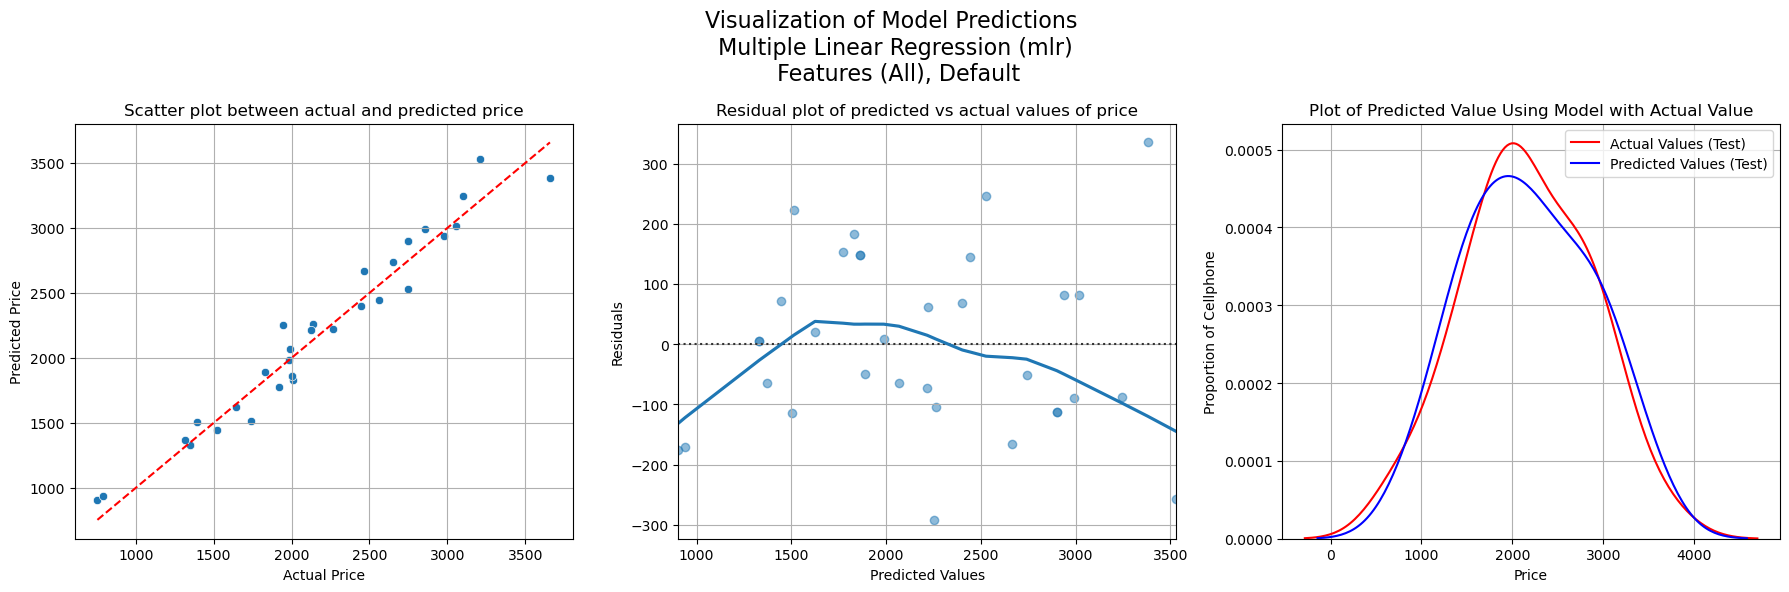

In [61]:
# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the scatter plot between actual and predicted house price
predictions = mlr.predict(X_test)

sns.scatterplot(x=y_test, y=predictions, ax=axes[0])
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')
axes[0].set_title('Scatter plot between actual and predicted price')
axes[0].grid()
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Calculate residuals
residuals = y_test - predictions

# Plot the residual plot
sns.residplot(x=predictions, y=residuals, lowess=True, ax=axes[1], scatter_kws={'alpha': 0.5})
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].grid()
axes[1].set_title('Residual plot of predicted vs actual values of price')

# Plot the distribution plot
Title = 'Plot of Predicted Value Using Model with Actual Value'
sns.distplot(y_test, hist=False, color="r", label="Actual Values (Test)", ax=axes[2])
sns.distplot(predictions, hist=False, color="b", label="Predicted Values (Test)", ax=axes[2])
axes[2].set_title(Title)
axes[2].set_xlabel('Price')
axes[2].set_ylabel('Proportion of Cellphone')
axes[2].grid()
axes[2].legend()

# Add super title
fig.suptitle('Visualization of Model Predictions \n Multiple Linear Regression (mlr) \n Features (All), Default', fontsize=16)

# Adjust layout and display the figure
plt.tight_layout()
plt.show()


### Thank you for taking the time to review my notebook!

Your attention and feedback are greatly appreciated!

**Linkedin:** [Link](https://www.linkedin.com/in/hazmannaim/)

**Github:** [Link](https://github.com/HazmanNaim)

**Kaggle:** [Link](https://www.kaggle.com/hazmannaim)